                                      Theory Questions

Q1. Can we use Bagging for regression problems?

Ans.
- Yes, Bagging (Bootstrap Aggregating) can absolutely be used for regression problems. In fact, it is a highly effective ensemble technique for reducing variance in predictive models.
- When used for regression, the core logic remains the same as in classification, but the way results are aggregated changes.

Q2. What is the difference between multiple model training and single model training?

Ans.
- Single model training:
  - Single model training involves selecting one specific algorithm (like a Decision Tree, Logistic Regression, or a Neural Network) and training it on the entire training dataset to find the best parameters.
  - Advantages:
    - Interpretability: It is much easier to explain how a single Linear Regression or Decision Tree reached a conclusion.
    - Computationally Cheap: Requires less memory and processing power since only one training process occurs.
    - Lower Complexity: Easier to deploy and maintain in a production environment.
  - Disadvantages:
    - High Risk of Bias or Variance: A single model might be too simple to capture the data (Underfitting) or too complex, capturing noise (Overfitting).
    - Sensitivity: If the training data changes slightly, the single model's performance can fluctuate significantly.
- Multiple model training (Or Essemble Learning):
  - Multiple model training involves training several models and combining their outputs to produce a final prediction.
  - This includes techniques like Bagging, Boosting, and Stacking.
  - Advantages:
    - Higher Accuracy: Often outperforms single models by reducing the overall error.
    - Robustness: Because it averages or votes across multiple models, it is less sensitive to outliers or noise in the data.
    - Variance/Bias Reduction: Techniques like Bagging reduce variance (overfitting), while Boosting reduces bias (underfitting).
  - Disadvantages:
    - Black Box Nature: It becomes very difficult to explain why the ensemble made a certain prediction (low interpretability).
    - Expensive: Training 100 trees (like in a Random Forest) takes significantly more time and hardware resources than training one.

Q3. Explain the concept of feature randomness in Random Forest?

Ans. In a Random Forest, feature randomness(also known as the "random subspace method") is the secret sauce that prevents the model from being just a collection of identical trees. While standard Decision Trees look at every available feature to find the best split, Random Forest restricts each split to a random subset of features.
- When building an individual tree within the forest, the algorithm doesn't use all features at once. Instead:
  - At each node of the tree, a random sample of $m$ features is chosen from the total $M$ features available.
  - The algorithm then searches only within that subset to find the best feature and threshold for the split.
  - This process repeats for every node in every tree.
  - Typically, for classification tasks, the number of features selected at each split is $m = \sqrt{M}$. For regression, it is often $m = M/3$.
- Feature randomness is a key idea behind Random Forest that helps reduce overfitting and improve generalization.
- Needs for the features randomness:
  - Reduces correlation between trees:
    - Strong features dominate normal trees
    - Random feature selection forces trees to be different
  - Reduces overfitting:
    - Less chance of memorizing noise
    - Improves generalization
  - Improves ensemble performance:
  - Diverse trees more the better averaged prediction.

Q4. What is OOB (Out-of-Bag) Score?

Ans.
- In a Random Forest, the Out-of-Bag (OOB) Score is a built-in validation method. It allows you to evaluate the model's performance during training without needing a separate validation set or performing cross-validation.
- In simple we say that OOB score is a built-in way to estimate the accuracy of a Random Forest without using a separate validation set.
- Random Forest uses bootstrap sampling:
  - Each tree is trained on a random sample drawn with replacement
  - About 63% of data points are used to train a tree
  - The remaining ~37% are not used → these are out-of-bag samples

Q5. How can you measure the importance of features in a Random Forest model?

Ans.
- In a Random Forest, measuring feature importance helps you understand which variables are doing the "heavy lifting" to make accurate predictions.
- There are two primary ways the algorithm calculates this internally.
- Mean Decrease in Impurity (Gini Importance): This is the default method used by most libraries (like scikit-learn). It measures how much each feature reduces the "impurity" of the nodes it splits.
  - How it works: Every time a node is split on a specific feature, the Gini impurity (for classification) or Mean Squared Error (for regression) decreases.
  - Calculation: The algorithm sums up all these decreases for a feature across all trees in the forest and averages them.
  - Average and normalize the result: Importance(f) = ∑ ΔImpurity
  - Pros: It is very fast to calculate.
  - Cons: It can be biased toward high-cardinality features (features with many unique values, like ZIP codes or IDs), making them seem more important than they actually are.
  - Interpretation:
    - Larger decrease --> more important feature
    - Values are normalized to sum to 1
- Mean Decrease in Accuracy (Permutation Importance): This method is often considered more reliable because it directly measures how much the model depends on a feature for its final performance.
  - How it works:
    - 1. The model is trained normally.
    - 2. For a specific feature, the values in that column are shuffled (permuted) randomly, breaking any relationship with the target.
    - 3. The model makes predictions on this "corrupted" data.
  - Calculation: The drop in the model's performance (e.g., accuracy or $R^2$) is recorded. If the accuracy drops significantly, the feature is highly important.
  - Pros: It is robust and does not favor high-cardinality features.
  - Cons: It is more computationally expensive because it requires re-evaluating the model for every feature.
  - Computation:
    - Measure baseline accuracy (often using OOB score).
    - Randomly permute one feature across samples.
    - Recompute accuracy.
    - Drop in accuracy = feature importance :  Importance(f) = Accuracy(baseline) ​− Accuracy(permuted f)
  - Interpretation: Bigger accuracy drop --> more important feature

Q6. Explain the working principle of a Bagging Classifier?

Ans.
- A Bagging classifier is an ensemble learning method that improves prediction accuracy by training multiple models on different samples of the data and combining their outputs.
- Its main goal is to reduce variance and prevent overfitting, especially for unstable models like decision trees.
- Core idea: Instead of training one model on the full dataset, bagging:
  - Trains many models
  - Each on a different random subset of the data
  - Aggregates their predictions
- Working principle:
  - Bootstrap sampling:
    - From the original training dataset of size N.
    - Create multiple new datasets by sampling with replacement
    - Each bootstrap dataset is also of size N.
  - Train base learners:
    - Train one base classifier on each bootstrap sample
    - Base learners are usually decision trees
    - Each model learns slightly different patterns.
  - Make predictions:
    - For a new data point: Each trained model gives a prediction
  - Aggregate predictions:
    - Classification: Majority voting
    - Regression: Average of predictions

    This aggregation reduces errors caused by individual models.

Q7. How do you evaluate a Bagging Classifier’s performance?

Ans. To evaluate a Bagging Classifier’s performance, we use standard classification metrics, plus a few methods that are especially useful for bagging.
- Test Set / Validation Set Evaluation:
  - How it works
    - Split data into training and test sets
    - Train the bagging classifier on training data
    - Evaluate predictions on test data
  - Common metrics:
    - Accuracy: The percentage of total guesses that were correct.
    - Precision: Out of all predicted positives, how many were actually positive?
    - Recall: Out of all actual positives, how many did the model find?
    - F1-score: The harmonic mean of Precision and Recall; great for imbalanced classes.
    - Confusion matrix: It maps the Actual values against the Predicted values, making it easy to see exactly where the model is getting "confused."
- Cross-Validation:
  - How it works:
    - Perform k-fold cross-validation
    - Train bagging classifier on K-1 folds.
    - Test on remaining fold
    - Average performance across folds
  - Why useful:
    - Reliable performance estimate
    - Reduces dependence on one split
- Out-of-Bag (OOB) Evaluation (Most Important for Bagging):
  - How it works
    - Each model is trained on a bootstrap sample
    - About 37% of data is left out (OOB samples)
    - For each data point:
      - Use only models where that point was OOB
      - Aggregate predictions and compute accuracy
  - Why OOB is powerful:
    - No separate validation set needed
    - Efficient use of data
    - Unbiased performance estimate
- ROC-AUC Curves:
  - For binary classification, the Receiver Operating Characteristic (ROC) curve helps you understand the trade-off between the True Positive Rate and False Positive Rate across different thresholds.
  - AUC (Area Under the Curve): A higher AUC (closer to 1.0) indicates the model is excellent at distinguishing between the two classes.
  - If your Bagging Classifier is performing poorly on the training set, it likely has a bias problem. Since Bagging only fixes variance, you might need to switch to a more complex base learner or try a Boosting algorithm instead.

Q8. How does a Bagging Regressor work?

Ans. A Bagging Regressor (Bootstrap Aggregating for regression) is an ensemble method that improves prediction accuracy by reducing variance through averaging multiple regression models.
- It is especially effective for high-variance regressors like decision trees.
- Instead of training one regression model, bagging:
  - Trains many regressors
  - Each on a different bootstrap sample of the data
  - Combines their predictions by averaging
- Working principles:
  - Bootstrap sampling:
    - From the original dataset of size N
    - Create multiple datasets by sampling with replacement
    - Each bootstrap sample has size N
    - Some data points repeat, some are left out (OOB).
  - Train base regressors:
    - Train one base regressor on each bootstrap sample
    - Base models are often: Decision tree regressors
    - Each regressor learns slightly different patterns.
  - Make predictions:
    - For a new input: Each regressor outputs a numerical prediction
  - Aggregate predictions:
    - Final prediction = average of all regressor outputs
    - y ​= 1/M​ ∑ ​y​i​
    - where M is number of regresssor model.
- Performance evaluation:
  - Mean Squared Error(MSE)
  - Root Mean Squared Error(RMSE)
  - R2 score
  - Out-of-Bag(OOB) error


Q9. What is the main advantage of ensemble techniques?

Ans. Advantage of Ensemble Techniques:
- The main advantage of ensemble techniques is that they combine multiple models to produce better predictions than any single model.
- Many weak or average models together make a strong, reliable model.
- Different models make different errors. When combined, these errors cancel out, leading to better performance.
- Improved accuracy:
  - Ensembles usually outperform individual models
  - More robust predictions
- Reduced overfitting:
  - Averaging (bagging) reduces variance
  - Boosting reduces bias
- Better generalization:
  - Performs well on unseen data
  - Less sensitive to noise
- Increased stability: Small data changes don’t affect predictions much.
- Bias–Variance perspective:
  - Bagging -> reduces variance
  - Boosting -> reduces bias
  - Ensembles -> better bias–variance balance

Q10. What is the main challenge of ensemble methods?

Ans. The main challenge of ensemble methods is their high computational cost and complexity.
- Ensemble methods:
  - Train many models instead of one
  - Require more time, memory, and processing power
  - Are harder to interpret than single models
- Key challenges:
  - Increased computational cost
    - Multiple models must be trained
    - Prediction time is slower
    - Not ideal for real-time or low-resource systems
  - Reduced interpretability
    - Hard to understand decisions
    - Difficult to explain to users (black-box behavior)
  - Risk of diminishing returns
    - Adding more models doesn’t always improve performance
    - Poorly chosen models add noise, not value
  - Data and tuning complexity
    - More hyperparameters to tune
    - Requires careful design to avoid redundancy


Q11. Explain the key idea behind ensemble techniques.

Ans. The key idea behind ensemble techniques is to combine multiple models so that their collective decision is more accurate and reliable than any single model.
- Each model learns something slightly different, and when their predictions are combined, individual errors tend to cancel out.
- combining models helps:
  - Different models make different errors
  - Errors are often uncorrelated
  - Aggregation(voting or averaging) reduces overall error
- predictions are combined:
  - Classification: In classification, each model predicts a class label. The final output is the class that gets the most votes(Majority voting)
  - Regression: In regression, each model predicts a numerical value. The final output is the average of all predictions(Averaging predictions)
- Essemble technique used:
  - Bagging
    - Parallel models
    - Reduces variance
  - Boosting
    - Sequential models
    - Reduces bias
  - Stacking
    - Meta-model learns how to combine predictions

Q12. What is a Random Forest Classifier?

Ans. A Random Forest Classifier is a machine-learning model that combines many decision trees to make more accurate and stable predictions.
- Instead of relying on a single tree(which can cause overfiting), it builds a forest of trees and lets them vote on the final class.
- How it works:
- Bootstrap sampling: Each tree is trained on a random sample of the training data (sampling with replacement).
- Random feature selection: At every split, a tree looks at only a random subset of features, not all of them.
- Ensemble voting: For classification, each tree predicts a class -> the class with the most votes wins.

Q13. What are the main types of ensemble techniques?

Ans. The main types of ensemble techniques are methods that combine multiple models to get better performance than any single model alone. There are four core types you’ll see most often.
- Bagging (Bootstrap Aggregating):
  - Idea: Train many models independently on different random samples of the data, then average or vote.
  - Why it works: it reduces variance and helps prevent overfitting.
  - Common examples
    - Random Forest (a smarter form of bagging)
    - BaggingClassifier / BaggingRegressor
  - Best for High-variance models (like decision trees)

- Boosting:
  - Idea: Train models sequentially, where each new model focuses more on the mistakes made by previous ones.
  - Why it works: It reduces bias and builds strong learners from weak ones.
  - Common examples
    - AdaBoost
    - Gradient Boosting
    - XGBoost, LightGBM, CatBoost
  - Best for Complex patterns, High predictive accuracy
- Stacking (Stacked Generalization):
  - Idea: Train different types of models and then train a meta-model to combine their predictions.
  - Why it works: It learns how to best combine models instead of just averaging them.
  - Common examples: Decision Tree + SVM + Logistic Regression, Random Forest + Linear Model
  - Best for Combining diverse models, Squeezing out extra performance
- Voting / Averaging
  - Idea: Combine predictions directly using majority vote (classification) or mean (regression).
  - Types:
    - Hard voting -> class labels
    - Soft voting -> predicted probabilities
  - Best for Simple ensembles, Quick performance boost with minimal complexity

Q14. What is ensemble learning in machine learning?

Ans.
- Ensemble learning is a machine-learning approach where multiple models are combined to solve the same problem and produce better predictions than any single model on its own.
- Instead of trusting one model, ensemble learning lets several models work together.
- How ensemble learning works:
  - Train multiple models (often called base learners)
  - Each model makes its own prediction
  - Predictions are combined using:
  - Voting (classification)
  - Averaging (regression)
  - Weighted combinations or a meta-model

Q15. When should we avoid using ensemble methods?

Ans. Ensemble methods are powerful, but they’re not always the right choice. You should avoid or be cautious about using them in these situations:
- 1. When interpretability is critical:
  - Ensembles (like Random Forests or Boosting) act like black boxes.
  - Avoid if You must clearly explain why a prediction was made, You’re working in regulated domains (finance, healthcare, law)
  - Prefer: linear models or a single decision tree

- 2. When the dataset is very small:
  - Ensembles need enough data to benefit from diversity.
  - Avoid if:
    - You have very few samples
    - Models start memorizing instead of generalizing
  - Prefer: simpler models with regularization

- 3. When computational resources are limited:
  - Ensembles are heavier in:
    - Training time
    - Memory usage
    - Inference latency
  - Avoid if:
    - You’re on edge devices.
    - You need real-time predictions
  - Prefer: lightweight models

- 4. When a simple model already performs well
  - If a basic model is accurate and stable, ensembles may add unnecessary complexity.
  - Avoid if:
    - Performance gain is marginal
    - Maintenance cost outweighs benefits

- 5. When data is highly noisy:
  - Some ensemble methods (especially boosting) can over-focus on noise.
  - Avoid if:
    - Labels are unreliable
    - Data has many outliers
  - Prefer: robust or regularized models

- 6. When fast model updates are required
  - Ensembles are slower to retrain and tune.
  - Avoid if:
    - Data changes frequently
    - You need quick retraining cycles

Q16. How does Bagging help in reducing overfitting?

Ans. Bagging reduces overfitting by training multiple models on different bootstrap samples and averaging their predictions, which lowers variance and stabilizes results.
- What Bagging does:
  - 1.Creates many different training sets: It uses bootstrap sampling (random sampling with replacement) to generate multiple datasets from the original data.
  - 2.Trains a model on each dataset: Each model sees a slightly different version of the data, so they make different mistakes.
  - 3.Aggregates predictions:
    - Classification -> majority vote
    - Regression -> average

Q17. Why is Random Forest better than a single Decision Tree?

Ans. Random Forest is better than a single Decision Tree because:
- Reduces overfitting by averaging many trees
- Lower variance and more stable predictions
- Better generalization on unseen data
- Handles noise and outliers more robustly
- Uses random feature selection, making trees less correlated
- Provides higher accuracy in most real-world problems

Q18. What is the role of bootstrap sampling in Bagging?

Ans. Bootstrap sampling is the key mechanism that makes Bagging work.
- Role of bootstrap sampling in Bagging:
  - Creates multiple different training datasets from the original data
  - Sampling is done with replacement, so each dataset is slightly different
  - Introduces diversity among the base models
  - Ensures models make different errors, not the same ones
  - Allows averaging/voting to reduce variance and overfitting
- Without bootstrap sampling, all models would see the same data and behave almost identically—Bagging would give no benefit.

Q19. What are some real-world applications of ensemble techniques?

Ans. Ensemble techniques are used wherever accuracy, robustness, and reliability really matter. Here are some real-world applications.
- Finance:
  - Credit scoring – combine models to predict loan default risk
  - Fraud detection – ensembles catch subtle and rare fraud patterns
  - Stock market prediction – reduce noise in financial data
- Healthcare:
  - Disease diagnosis – cancer detection, heart disease prediction
  - Medical imaging – ensembles improve accuracy in X-ray/MRI analysis
  - Patient risk prediction – ICU readmission, survival analysis
- E-commerce & Marketing:
  - Recommendation systems – product and content recommendations
  - Customer churn prediction – identify users likely to leave
  - Ad click-through prediction – improve targeting accuracy

Q20. What is the difference between Bagging and Boosting?

Ans. The difference between Bagging and Boosting are as follow:

- Bagging (Bootstrap Aggregating):
  - Models are trained independently
  - Training happens in parallel
  - Uses random bootstrap samples
  - Focuses on reducing variance
  - Works best with high-variance models (e.g., decision trees)
  - Less sensitive to noise
  - Example: Random Forest

- Boosting:
  - Models are trained sequentially
  - Each new model focuses more on previous errors
  - Uses weighted samples
  - Focuses on reducing bias
  - Can overfit if data is noisy
  - Example: AdaBoost, Gradient Boosting, XGBoost

                                 Practical Questions

In [1]:
# Q21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load a sample dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base estimator
base_tree = DecisionTreeClassifier(random_state=42)

# Bagging classifier
bagging_clf = BaggingClassifier(
    estimator=base_tree,
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predictions
y_pred = bagging_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9561


In [2]:
# Q22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Load a sample regression dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base regressor
base_tree = DecisionTreeRegressor(random_state=42)

# Bagging regressor
bagging_reg = BaggingRegressor(
    estimator=base_tree,
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train the model
bagging_reg.fit(X_train, y_train)

# Predictions
y_pred = bagging_reg.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.2559


In [3]:
# Q23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Get feature importances
importances = rf_clf.feature_importances_

# Display feature importance scores
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)


                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fractal dimension    0.005210


In [4]:
# Q24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load regression dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Train Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=1)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=1,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

# Evaluate models
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f"Decision Tree MSE: {dt_mse:.4f}")
print(f"Random Forest MSE: {rf_mse:.4f}")


Decision Tree MSE: 0.5013
Random Forest MSE: 0.2542


In [5]:
# Q25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train Random Forest with OOB enabled
rf_clf = RandomForestClassifier(
    n_estimators=200,
    oob_score=True,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X, y)

# Print OOB score
print(f"OOB Score: {rf_clf.oob_score_:.4f}")


OOB Score: 0.9596


In [7]:
# Q26. Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base estimator (SVM)
svm = SVC(kernel="rbf", probability=True, random_state=42)

# Bagging Classifier with SVM
bagging_svm = BaggingClassifier(
    estimator=svm,
    n_estimators=20,
    random_state=42,
    n_jobs=-1
)

# Train model
bagging_svm.fit(X_train, y_train)

# Predictions
y_pred = bagging_svm.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.9474


In [8]:
# Q27. Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Different numbers of trees
n_estimators_list = [10, 50, 100, 200]

for n_estimators in n_estimators_list:
    rf_clf = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=42,
        n_jobs=-1
    )

    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Trees: {n_estimators:3d} | Accuracy: {accuracy:.4f}")

Trees:  10 | Accuracy: 0.9561
Trees:  50 | Accuracy: 0.9649
Trees: 100 | Accuracy: 0.9649
Trees: 200 | Accuracy: 0.9649


In [9]:
# Q28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Base estimator (Logistic Regression)
log_reg = LogisticRegression(
    max_iter=1000,
    solver="liblinear"
)

# Bagging Classifier
bagging_lr = BaggingClassifier(
    estimator=log_reg,
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# Train model
bagging_lr.fit(X_train, y_train)

# Predict probabilities
y_prob = bagging_lr.predict_proba(X_test)[:, 1]

# AUC score
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")


AUC Score: 0.9950


In [11]:
# Q29. Train a Random Forest Regressor and analyze feature importance scores.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_reg.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Random Forest Feature Importances:")
print(feature_importance)

Random Forest Feature Importances:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


In [12]:
# Q30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(X_train, y_train)
bagging_acc = accuracy_score(y_test, bagging_clf.predict(X_test))

# Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"Bagging Classifier Accuracy: {bagging_acc:.4f}")
print(f"Random Forest Accuracy:     {rf_acc:.4f}")

Bagging Classifier Accuracy: 0.9561
Random Forest Accuracy:     0.9649


In [17]:
# Q31.  Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 7]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9649


In [16]:
# Q32. Train a Bagging Regressor with different numbers of base estimators and compare performance

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Different numbers of estimators
n_estimators_list = [10, 50, 100, 200]

for n_estimators in n_estimators_list:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=n_estimators,
        random_state=42,
        n_jobs=-1
    )

    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Estimators: {n_estimators:3d} | MSE: {mse:.4f}")

Estimators:  10 | MSE: 0.2824
Estimators:  50 | MSE: 0.2573
Estimators: 100 | MSE: 0.2559
Estimators: 200 | MSE: 0.2541


In [18]:
# Q33. Train a Random Forest Classifier and analyze misclassified samples.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Find misclassified samples
misclassified_idx = y_pred != y_test

misclassified_samples = pd.DataFrame(
    X_test[misclassified_idx],
    columns=data.feature_names
)
misclassified_samples["True Label"] = y_test[misclassified_idx]
misclassified_samples["Predicted Label"] = y_pred[misclassified_idx]

print(f"Number of misclassified samples: {misclassified_samples.shape[0]}")
print(misclassified_samples.head())

In [19]:
# Q34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Bagging Classifier
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging.fit(X_train, y_train)
bag_pred = bagging.predict(X_test)
bag_acc = accuracy_score(y_test, bag_pred)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Bagging Accuracy:       {bag_acc:.4f}")

Decision Tree Accuracy: 0.9474
Bagging Accuracy:       0.9561


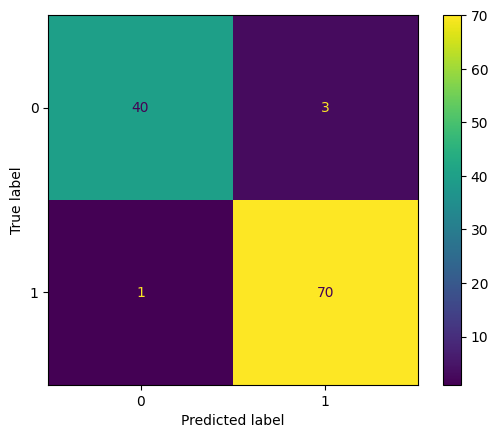

In [23]:
# Q35. Train a Random Forest Classifier and visualize the confusion matrix.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
X, y = load_breast_cancer(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [28]:
# Q36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Base models
dt = DecisionTreeClassifier(random_state=42)

svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=5000))
])

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ("dt", dt),
        ("svm", svm),
        ("lr", lr)
    ],
    final_estimator=LogisticRegression(max_iter=5000),
    n_jobs=-1
)

# Train model
stacking_clf.fit(X_train, y_train)

# Predictions
y_pred = stacking_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


Stacking Classifier Accuracy: 0.9737


In [26]:
# Q37. Train a Random Forest Classifier and print the top 5 most important features.

import pandas as pd

data = load_breast_cancer()
feature_names = data.feature_names

importances = rf.feature_importances_

feature_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("Top 5 Most Important Features:")
print(feature_df.head(5))

Top 5 Most Important Features:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


In [27]:
# Q38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Bagging classifier
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

bagging.fit(X_train, y_train)
bag_pred = bagging.predict(X_test)

# Metrics
precision = precision_score(y_test, bag_pred)
recall = recall_score(y_test, bag_pred)
f1 = f1_score(y_test, bag_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Precision: 0.9583
Recall:    0.9718
F1-score:  0.9650


In [33]:
# Q39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

depths = [None, 3, 5, 10, 20]

print("Effect of max_depth on Accuracy")
for depth in depths:
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"max_depth={depth} → Accuracy={acc:.4f}")

Effect of max_depth on Accuracy
max_depth=None → Accuracy=0.9649
max_depth=3 → Accuracy=0.9649
max_depth=5 → Accuracy=0.9649
max_depth=10 → Accuracy=0.9649
max_depth=20 → Accuracy=0.9649


In [34]:
# Q40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
}

print("\nBagging Regressor Performance")
for name, base_model in models.items():
    bag = BaggingRegressor(
        estimator=base_model,
        n_estimators=50,
        random_state=42,
        n_jobs=-1
    )
    bag.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bag.predict(X_test))
    print(f"{name} Base → MSE={mse:.4f}")


Bagging Regressor Performance
Decision Tree Base → MSE=0.2573
KNN Base → MSE=1.0763


In [36]:
# Q41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.metrics import roc_auc_score

rf_auc = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_auc.fit(X_train, y_train)
y_prob = rf_auc.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nRandom Forest ROC-AUC Score: {roc_auc:.4f}")



Random Forest ROC-AUC Score: 0.9953


In [37]:
# Q42. Train a Bagging Classifier and evaluate its performance using cross-validation.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

cv_scores = cross_val_score(
    bagging_clf, X, y, cv=5, scoring="accuracy"
)

print("\nBagging Classifier Cross-Validation Accuracy")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Dev:       {cv_scores.std():.4f}")



Bagging Classifier Cross-Validation Accuracy
Mean Accuracy: 0.9579
Std Dev:       0.0382


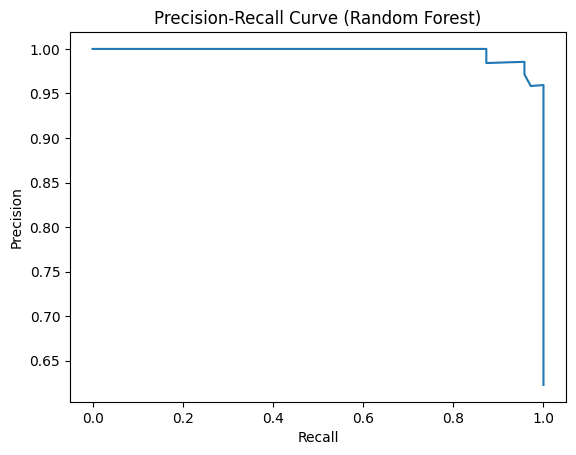

In [38]:
# Q43. Train a Random Forest Classifier and plot the Precision-Recall curve.

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

rf_pr = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_pr.fit(X_train, y_train)
y_scores = rf_pr.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.show()

In [40]:
# Q44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression (with scaling)
lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=5000))
])

# Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ("rf", rf),
        ("lr", lr)
    ],
    final_estimator=LogisticRegression(max_iter=5000),
    n_jobs=-1
)

# Train models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

# Predictions
rf_acc = accuracy_score(y_test, rf.predict(X_test))
lr_acc = accuracy_score(y_test, lr.predict(X_test))
stack_acc = accuracy_score(y_test, stacking_clf.predict(X_test))

print("Accuracy Comparison")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"Stacking Classifier Accuracy: {stack_acc:.4f}")

Accuracy Comparison
Random Forest Accuracy: 0.9561
Logistic Regression Accuracy: 0.9825
Stacking Classifier Accuracy: 0.9737


In [42]:
# Q45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

configs = [
    {"bootstrap": True, "max_samples": 1.0},
    {"bootstrap": True, "max_samples": 0.7},
    {"bootstrap": False, "max_samples": 1.0}
]

print("\nBagging Regressor Performance (MSE)")
for cfg in configs:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=100,
        bootstrap=cfg["bootstrap"],
        max_samples=cfg["max_samples"],
        random_state=42,
        n_jobs=-1
    )

    bagging_reg.fit(X_train, y_train)
    preds = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, preds)

    print(
        f"bootstrap={cfg['bootstrap']}, "
        f"max_samples={cfg['max_samples']} : MSE={mse:.4f}"
    )


Bagging Regressor Performance (MSE)
bootstrap=True, max_samples=1.0 : MSE=0.2559
bootstrap=True, max_samples=0.7 : MSE=0.2590
bootstrap=False, max_samples=1.0 : MSE=0.4645
